# Start Here
If raw iEEG data is available and in correct location, execute cells in order, otherwise execute below cell then continue from section 2.1

In [1]:
import glob
import sys
import os
import random
from datetime import datetime
import pandas as pd
import numpy as np
from scipy.io import loadmat
from scipy.signal import resample
from scipy import fftpack
import scipy

random.seed(a = '357')

# add to path if not currently in there...
data_folder = os.path.expanduser('~/Documents/seizure_data')
if data_folder not in sys.path:
    sys.path.insert(0, data_folder)

# 1.0 File Exploration
Use unsafe list provided from Kaggle to segregate unsafe files from rest of files in directory. This assumes a folder exists inside each patient folder called "unsafe". Also, look in the folders where all the data files are located and count contents, along with generate file lists.

In [2]:
from numpy import recfromcsv
import shutil

# 3 patient data locations
data_folder1 = os.path.expanduser('~/Documents/seizure_data/train_1')
data_folder2 = os.path.expanduser('~/Documents/seizure_data/train_2')
data_folder3 = os.path.expanduser('~/Documents/seizure_data/train_3')

test_data_subfolder_1 = os.path.expanduser('~/Documents/seizure_data/test_1_new')
test_data_subfolder_2 = os.path.expanduser('~/Documents/seizure_data/test_2_new')
test_data_subfolder_3 = os.path.expanduser('~/Documents/seizure_data/test_3_new')

# this was used for some one time sorting of bad data
my_data = recfromcsv(data_folder+'/train_and_test_data_labels_safe.csv', delimiter=',')
found_files = 0
not_found_files = 0
for column in my_data:
    try:
        if ((column[2]) == 0 and (column[0][0] == '1')):
            shutil.move(os.path.join(data_folder1,column[0]), data_folder1+'/unsafe/'+column[0])
            found_files = found_files + 1
            print 'file moved: ', column[0]
        if ((column[2]) == 0 and (column[0][0] == '2')):
            shutil.move(os.path.join(data_folder2,column[0]), data_folder2+'/unsafe/'+column[0])
            found_files = found_files + 1
            print 'file moved: ', column[0]
        if ((column[2]) == 0 and (column[0][0] == '3')):
            shutil.move(os.path.join(data_folder3,column[0]), data_folder3+'/unsafe/'+column[0])
            found_files = found_files + 1
            print 'file moved: ', column[0]
    except:
        not_found_files = not_found_files + 1
        print 'file not found: ', column[0]
print "done! Found Files: ", found_files, "Missing Files: ", not_found_files, " ", datetime.now().strftime('%Y-%m-%d %H:%M:%S')

file not found:  1_1_0.mat
file not found:  1_2_0.mat
file not found:  1_3_0.mat
file not found:  1_4_0.mat
file not found:  1_5_0.mat
file not found:  1_6_0.mat
file not found:  1_127_0.mat
file not found:  1_128_0.mat
file not found:  1_129_0.mat
file not found:  1_130_0.mat
file not found:  1_131_0.mat
file not found:  1_132_0.mat
file not found:  1_133_0.mat
file not found:  1_134_0.mat
file not found:  1_135_0.mat
file not found:  1_136_0.mat
file not found:  1_137_0.mat
file not found:  1_138_0.mat
file not found:  1_139_0.mat
file not found:  1_140_0.mat
file not found:  1_141_0.mat
file not found:  1_142_0.mat
file not found:  1_143_0.mat
file not found:  1_144_0.mat
file not found:  1_145_0.mat
file not found:  1_146_0.mat
file not found:  1_147_0.mat
file not found:  1_148_0.mat
file not found:  1_149_0.mat
file not found:  1_150_0.mat
file not found:  1_151_0.mat
file not found:  1_152_0.mat
file not found:  1_153_0.mat
file not found:  1_154_0.mat
file not found:  1_155_0.m

In [3]:
print "Labeled Training Files"

# build two lists, one for each file type
interictal_files_1 = []
preictal_files_1 = []
for name in glob.glob(data_folder1+'/*0.mat'):
    interictal_files_1.append(name)
for name in glob.glob(data_folder1+'/*1.mat'):
    preictal_files_1.append(name)
print "total interictal_files 1:  %d"%len(interictal_files_1)
print "total preictal_files 1:    %d"%len(preictal_files_1)

interictal_files_2 = []
preictal_files_2 = []
for name in glob.glob(data_folder2+'/*0.mat'):
    interictal_files_2.append(name)
for name in glob.glob(data_folder2+'/*1.mat'):
    preictal_files_2.append(name)
print "total interictal_files 2:  %d"%len(interictal_files_2)
print "total preictal_files 2:    %d"%len(preictal_files_2)

interictal_files_3 = []
preictal_files_3 = []
for name in glob.glob(data_folder3+'/*0.mat'):
    interictal_files_3.append(name)
for name in glob.glob(data_folder3+'/*1.mat'):
    preictal_files_3.append(name)
print "total interictal_files 3:  %d"%len(interictal_files_3)
print "total preictal_files 3:    %d"%len(preictal_files_3)

print "\nUnlabeled Test Files"
test_files_1 = []
for name in glob.glob(test_data_subfolder_1+'/*.mat'):
    test_files_1.append(name)
print "total patient test files 1:  %d"%len(test_files_1)

test_files_2 = []
for name in glob.glob(test_data_subfolder_2+'/*.mat'):
    test_files_2.append(name)
print "total patient test files 2:  %d"%len(test_files_2)

test_files_3 = []
for name in glob.glob(test_data_subfolder_3+'/*.mat'):
    test_files_3.append(name)
print "total patient test files 3:  %d"%len(test_files_3)

Labeled Training Files
total interictal_files 1:  570
total preictal_files 1:    144
total interictal_files 2:  1836
total preictal_files 2:    150
total interictal_files 3:  1908
total preictal_files 3:    150

Unlabeled Test Files
total patient test files 1:  216
total patient test files 2:  1002
total patient test files 3:  690


# 2.0 Feature Extraction
These functions are used to do the actualy feature extraction

In [4]:
def sum_fft_bands(files,bands):
    # this will be used to label columns
    bands_labels = []
    for i in range(16):
        for j in range(len(bands) - 1):
            bands_labels.extend(['Chan %d Band %d-%d'%(i,bands[j],bands[j+1])])
        
    features_titles = ["File Name"] + bands_labels + ["Class"]
    
    # store the working array of features here, will convert later to pandas data frame
    working_features = [] # each row is all the features for a single file
    for i in range(len(files)):
        try:
            # put out percentage complete
            sys.stdout.write('\r%d'%(100*i/len(files)))
            # read in first file
            file = loadmat(files[i])
            # transpose just data in file, this is how we expect it down below
            data = file['dataStruct'][0][0][0].transpose()

            # full fft data for 16 chans
            fft_chans = np.abs(np.array(fftpack.fft(data)))

            # for each channel, sum up each band
            summed_bands = [] # store full set of summed bands for each channel here
            for i_band in range(len(bands) - 1):
                summed_chan = [] # store sum for single band for each channel here
                # sum fft band for each channel
                for i_chan in range(16):
                    # take log and normalize
                    fft = scipy.log10(fft_chans[i_chan]+1)
                    if fft.max() != 0:
                        # some files are filled with all zero, so their fft is all zero,
                        # so we would /0 if did not make this check
                        fft = fft/fft.max()
                    # create summed power band and divide by band width to normalize
                    sum_band = sum(fft[bands[i_band]:bands[i_band+1]])/(bands[i_band+1]-bands[i_band])
                    summed_chan.append(sum_band)
                # extend this row in the features table with all channels binned for this one band
                summed_bands.extend(summed_chan)
            # now put features with all file/class info in features array
            summed_bands = [files[i].replace(data_folder,"")] + summed_bands + [int(files[i][len(files[i])-5])]
            working_features.append(summed_bands)
        except:
            summed_bands = []
            for i_band in range(len(bands) - 1):
                summed_chan = []
                for i_chan in range(16):
                    summed_chan.append(0)
                summed_bands.extend(summed_chan)
            summed_bands = [files[i].replace(data_folder,"")] + summed_bands + [int(files[i][len(files[i])-5])]
            
            working_features.append(summed_bands)
            print "\nFile processing failed, filling with zeros"
            print files[i]
    features = pd.DataFrame(working_features,columns = features_titles)
    return features

# takes a list of files and a sample size and returns a list while preserving 1 hour group segments
def random_set(files, sample_size):
    starting_sequence_files = []
    # look through files and pick out all files that start at sequence 1
    for data_file in files:
        # get trailing part of directory string
        trailing_string = data_file.replace(data_folder,"")[11:]
        # check if this files is a multiple of 6, starting from 1...
        if (int(trailing_string[:(len(trailing_string)-6)]))%6==1:
            starting_sequence_files.append(data_file)
    # now take subset of all files starting at sequence 1, this will be 1/6 of requested sample size
    starting_sequence_subset = random.sample(starting_sequence_files, sample_size/6)
    
    final_sample = []
    for sub_starter in starting_sequence_subset:
        final_sample.append(sub_starter)
        # make 2 string, leading string and trailing string
        # these will be tacked on either end of the number which indicates the sequence
        leading_string = data_folder + sub_starter.replace(data_folder,"")[:11]
        trailing_string = sub_starter[(len(sub_starter)-6):]
        # go create the directories of the following 5 files for each sub_starter
        sub_starter_sequence = int(sub_starter.replace(leading_string, "").replace(trailing_string, ""))
        for i in range(5):
            final_sample.append(leading_string+str(sub_starter_sequence+i+1)+trailing_string)
    return final_sample

In [5]:
# must be multiple of 24!!! We divide by 6 then divide by 4 (maybe 2...) for the test/train split
preictal_sample_size = 144
interictal_sample_size = preictal_sample_size

# this is what we need to multiple the frequency bin indexes by, there are 120,000 indexes for 200Hz
freq_mult = 600
fft_bands_Hz = [0, 0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.8, 25.6, 51.2, 102.4]

fft_bands = [int(x*freq_mult) for x in fft_bands_Hz]
random.seed(a = '357')

print "Processing patient 1 features"
interictal_sample_files_1 = random_set(interictal_files_1, interictal_sample_size)
preictal_sample_files_1 = random_set(preictal_files_1, preictal_sample_size)
# don't mix the two types yet we want to split along group lines later
X_data_preic_1 = sum_fft_bands(preictal_sample_files_1,fft_bands)
X_data_inter_1 = sum_fft_bands(interictal_sample_files_1,fft_bands)
print '\nPatient 1 features processing complete'
print X_data_preic_1.shape
print X_data_inter_1.shape

print "Processing patient 2 features"
interictal_sample_files_2 = random_set(interictal_files_2, interictal_sample_size)
preictal_sample_files_2 = random_set(preictal_files_2, preictal_sample_size)
# don't mix the two types yet we want to split along group lines later
X_data_preic_2 = sum_fft_bands(preictal_sample_files_2,fft_bands)
X_data_inter_2 = sum_fft_bands(interictal_sample_files_2,fft_bands)
print '\nPatient 2 features processing complete'
print X_data_preic_2.shape
print X_data_inter_2.shape

print "Processing patient 3 features"
interictal_sample_files_3 = random_set(interictal_files_3, interictal_sample_size)
preictal_sample_files_3 = random_set(preictal_files_3, preictal_sample_size)
# don't mix the two types yet we want to split along group lines later
X_data_preic_3 = sum_fft_bands(preictal_sample_files_3,fft_bands)
X_data_inter_3 = sum_fft_bands(interictal_sample_files_3,fft_bands)
print '\nPatient 3 features processing complete'
print X_data_preic_3.shape
print X_data_inter_3.shape

print "done! ", datetime.now().strftime('%Y-%m-%d %H:%M:%S')

Processing patient 1 features
99
Patient 1 features processing complete
(144, 178)
(144, 178)
Processing patient 2 features
99
Patient 2 features processing complete
(144, 178)
(144, 178)
Processing patient 3 features
99
Patient 3 features processing complete
(144, 178)
(144, 178)
done!  2017-01-20 13:28:28


In [6]:
print "Processing patient 1 features"
test_files_1 = []
for name in glob.glob(test_data_subfolder_1+'/*.mat'):
    test_files_1.append(name)
print len(test_files_1)
X_data_1 = sum_fft_bands(test_files_1,fft_bands)
print X_data_1.shape

print "Processing patient 2 features"
test_files_2 = []
for name in glob.glob(test_data_subfolder_2+'/*.mat'):
    test_files_2.append(name)
print len(test_files_2)
X_data_2 = sum_fft_bands(test_files_2,fft_bands)
print X_data_2.shape

print "Processing patient 3 features"
test_files_3 = []
for name in glob.glob(test_data_subfolder_3+'/*.mat'):
    test_files_3.append(name)
print len(test_files_3)
X_data_3 = sum_fft_bands(test_files_3,fft_bands)
print X_data_3.shape

print "done! ", datetime.now().strftime('%Y-%m-%d %H:%M:%S')

Processing patient 1 features
216
99(216, 178)
Processing patient 2 features
1002
99(1002, 178)
Processing patient 3 features
690
99(690, 178)
done!  2017-01-20 13:58:03


In [7]:
# save all the data to csv files
X_data_preic_1.to_csv(data_folder + "/patient_1_preic_labeled_features.csv")
X_data_inter_1.to_csv(data_folder + "/patient_1_inter_labeled_features.csv")

X_data_preic_2.to_csv(data_folder + "/patient_2_preic_labeled_features.csv")
X_data_inter_2.to_csv(data_folder + "/patient_2_inter_labeled_features.csv")

X_data_preic_3.to_csv(data_folder + "/patient_3_preic_labeled_features.csv")
X_data_inter_3.to_csv(data_folder + "/patient_3_inter_labeled_features.csv")

X_data_1.to_csv(data_folder + "/patient_1_unlabeled_features.csv")
X_data_2.to_csv(data_folder + "/patient_2_unlabeled_features.csv")
X_data_3.to_csv(data_folder + "/patient_3_unlabeled_features.csv")

print "done! ", datetime.now().strftime('%Y-%m-%d %H:%M:%S')

done!  2017-01-20 13:58:14


# 2.1 Continue with Features from .CSV
If the raw iEEG data files are not available but features are already processed and are in .csv, then continue from this point on

In [2]:
X_data_preic_1=pd.DataFrame.from_csv(data_folder + "/patient_1_preic_labeled_features.csv")
X_data_inter_1=pd.DataFrame.from_csv(data_folder + "/patient_1_inter_labeled_features.csv")

X_data_preic_2=pd.DataFrame.from_csv(data_folder + "/patient_2_preic_labeled_features.csv")
X_data_inter_2=pd.DataFrame.from_csv(data_folder + "/patient_2_inter_labeled_features.csv")

X_data_preic_3=pd.DataFrame.from_csv(data_folder + "/patient_3_preic_labeled_features.csv")
X_data_inter_3=pd.DataFrame.from_csv(data_folder + "/patient_3_inter_labeled_features.csv")

X_data_1=pd.DataFrame.from_csv(data_folder + "/patient_1_unlabeled_features.csv")
X_data_2=pd.DataFrame.from_csv(data_folder + "/patient_2_unlabeled_features.csv")
X_data_3=pd.DataFrame.from_csv(data_folder + "/patient_3_unlabeled_features.csv")

print X_data_preic_1.shape
print X_data_inter_1.shape
print X_data_preic_2.shape
print X_data_inter_2.shape
print X_data_preic_3.shape
print X_data_inter_3.shape

print X_data_1.shape
print X_data_2.shape
print X_data_3.shape

(144, 178)
(144, 178)
(144, 178)
(144, 178)
(144, 178)
(144, 178)
(216, 178)
(1002, 178)
(690, 178)


# 3.0 Classifier Selection
Try a variety of classifiers and choose one best suited for this problem

In [3]:
# remove instnaces where the frequency bins are all zero
def removeZeros(feature_table, with_file_and_class = True):
    pd_feature_table = pd.DataFrame(feature_table)
    zeros_removed = pd.DataFrame()
    if with_file_and_class == True:
        for items, index in itertools.izip(pd_feature_table.drop(['File Name','Class'], axis=1).iterrows(), range(len(pd_feature_table))):
            if not (items[1] == 0).all():
                zeros_removed = zeros_removed.append(pd_feature_table.iloc[[index]], ignore_index=True)
    else:
        for index, items in pd_feature_table.iterrows():
            if not (items == 0).all():
                zeros_removed = zeros_removed.append(pd_feature_table.iloc[index], ignore_index=True)
    return zeros_removed

In [4]:
# variety of classifiers
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.cross_validation import train_test_split
import itertools
from sklearn import linear_model, svm
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit, train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

np.random.seed(357)

print "Fitting..."
for pre_set, int_set, patient in itertools.izip((X_data_preic_1, X_data_preic_2, X_data_preic_3), (X_data_inter_1, X_data_inter_2, X_data_inter_3), range(3)):
    # first make two new groups, each with half from each preictal and interictal, keep class and file info for now
    # we need to split them without shuffling first becuase we need to make sure the sequences
    # of six stay together, reguardless of which group they go to
    train_data = pd.concat([pre_set[(len(pre_set)/4):], int_set[(len(int_set)/4):]])
    
    # now seperate the columns into features and classes for each group
    X_train = train_data.drop(['File Name','Class'], axis=1)
    y_train = train_data['Class']
    
    # make our k fold index lists
    cv = StratifiedKFold(y_train, n_folds=4, shuffle=False)
    
    # we have our index lists, shuffle each one now individually
    shuffled_cv = []
    for thing in cv:
        sub_pair = []
        for subthing in thing:
            things = subthing
            np.random.shuffle(things)
            sub_pair.append(things)
        shuffled_cv.append(sub_pair)
        
    cv = shuffled_cv
    
    # store classifier results here for display later
    all_results = []
    
    scorer = make_scorer(roc_auc_score)
    
    model_summary = pd.DataFrame([])
    model_summary.append(["Patient %d : "%(patient+1)],ignore_index=True)
    
    print "Patient %d : "%(patient+1)
    
    clf = svm.SVC(kernel="linear", probability = True)
    print type(clf), clf.kernel
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = svm.SVC(kernel="rbf", probability = True)
    print type(clf), clf.kernel
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = svm.SVC(kernel="poly", probability = True)
    print type(clf), clf.kernel
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = svm.SVC(kernel="sigmoid", probability = True)
    print type(clf), clf.kernel
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = linear_model.LogisticRegression()
    print type(clf)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = KNeighborsClassifier()
    print type(clf)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = DecisionTreeClassifier()
    print type(clf)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = AdaBoostClassifier()
    print type(clf)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = GaussianNB()
    print type(clf)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    clf = RandomForestClassifier()
    print type(clf)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring = scorer)
    print "Average Score: %.3f"%np.mean(scores)
    all_results.append([type(clf),np.mean(scores)])
    
    column = [column[1] for column in all_results]
    print "Best model: ",all_results[column.index(max(column))]
    
    print ""
print "done!"

Fitting...
Patient 1 : 
<class 'sklearn.svm.classes.SVC'> linear
Average Score: 0.685
<class 'sklearn.svm.classes.SVC'> rbf
Average Score: 0.523
<class 'sklearn.svm.classes.SVC'> poly
Average Score: 0.519
<class 'sklearn.svm.classes.SVC'> sigmoid
Average Score: 0.500
<class 'sklearn.linear_model.logistic.LogisticRegression'>
Average Score: 0.634
<class 'sklearn.neighbors.classification.KNeighborsClassifier'>
Average Score: 0.676
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
Average Score: 0.648
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>
Average Score: 0.579
<class 'sklearn.naive_bayes.GaussianNB'>
Average Score: 0.486
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Average Score: 0.648
Best model:  [<class 'sklearn.svm.classes.SVC'>, 0.68518518518518512]

Patient 2 : 
<class 'sklearn.svm.classes.SVC'> linear
Average Score: 0.704
<class 'sklearn.svm.classes.SVC'> rbf
Average Score: 0.519
<class 'sklearn.svm.classes.SVC'> poly
Average Score: 0.519
<class 

# 4.0 Model Tuning/Refinement
Refine and tune chosen models

In [5]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split, KFold, StratifiedKFold

def ModelComplexity(clf, X, y, variable, min_var, max_var, step):
    
    # StratifiedKFold will make n sets each with 50/50 preictal/interictal, since the set being passed in is already 50/50
    # If shuffle is True, we will mix sets of six between train and test sets and the model will learn patterns for that set
    # that do not generalize to non-sequenced data. So don't shuffle!
    
    np.random.seed(357)
    
    cv = StratifiedKFold(y, n_folds=8, shuffle=False)   
    shuffled_cv = []
    for thing in cv:
        sub_pair = []
        for subthing in thing:
            things = subthing
            np.random.shuffle(things)
            sub_pair.append(things)
        shuffled_cv.append(sub_pair)
    cv = shuffled_cv

    # Vary the parameter from min to max
    variable_range = np.arange(min_var,max_var,step)
    
    scorer = make_scorer(roc_auc_score)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(clf, X, y, \
        param_name = variable, param_range = variable_range, cv = cv, scoring = scorer)
    
    print clf

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title(str(type(clf)) + " " + str(clf.kernel))
    pl.plot(variable_range, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(variable_range, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(variable_range, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(variable_range, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel(variable)
    pl.ylabel('Score')
    pl.ylim([0.45,1.05])
    pl.grid()
    pl.show()

SVC(C=780, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


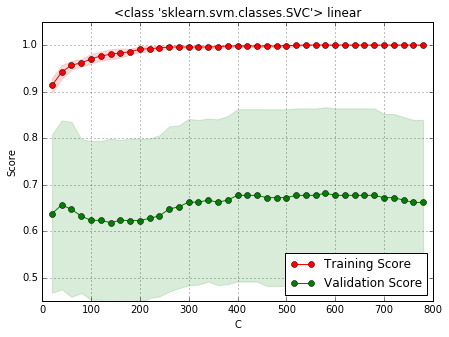

SVC(C=780, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


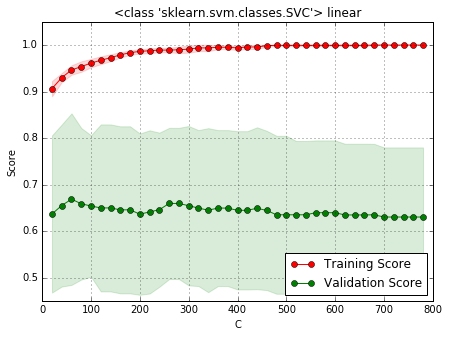

SVC(C=780, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


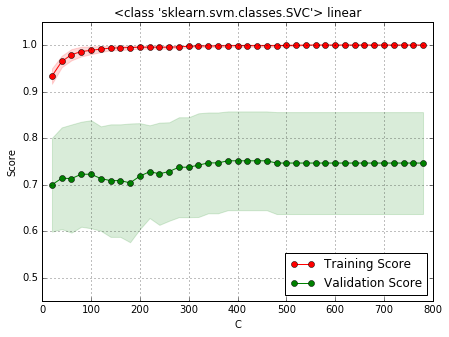

In [9]:
# visualize some model variables
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score, make_scorer, roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, svm, metrics
from sklearn.tree import DecisionTreeClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

for pre_set, int_set, patient in itertools.izip((X_data_preic_1, X_data_preic_2, X_data_preic_3), (X_data_inter_1, X_data_inter_2, X_data_inter_3), range(3)):
    # first make two new groups, each with half from each preictal and interictal, keep class and file info for now
    # we need to split them without shuffling first becuase we need to make sure the sequences
    # of six stay together, reguardless of which group they go to
    
    train_data = pd.concat([pre_set[(len(pre_set)/4):], int_set[(len(int_set)/4):]])
    #train_data = pd.concat([pre_set, int_set])
    
    train_data = removeZeros(train_data)
    
    # now seperate the columns into features and classes for each group
    X_train = train_data.drop(['File Name','Class'], axis=1)
    y_train = train_data['Class']
    
    clf =  svm.SVC(kernel='linear', probability = True)
    
    ModelComplexity(clf, X_train, y_train,'C',20,800,20)

In [10]:
# patient 1 fitting
np.random.seed(357)

train_data = pd.concat([X_data_preic_1[(len(X_data_preic_1)/4):], X_data_inter_1[(len(X_data_inter_1)/4):]])
test_data = pd.concat([X_data_preic_1[:(len(X_data_preic_1)/4)], X_data_inter_1[:(len(X_data_inter_1)/4)]])

train_data = removeZeros(train_data)
test_data = removeZeros(test_data)

# now shuffle each group individually
train_data = train_data.iloc[np.random.permutation(len(train_data))]
test_data = test_data.iloc[np.random.permutation(len(test_data))]
# now seperate the columns into features and classes for each group
X_train = train_data.drop(['File Name','Class'], axis=1)
X_test = test_data.drop(['File Name','Class'], axis=1)
y_train = train_data['Class']
y_test = test_data['Class']

clf1 = svm.SVC(kernel='linear', C = 580, probability = True)
clf1.fit(X_train, y_train)
y_pred = clf1.predict_proba(X_test)
print 'ROC AUC:', roc_auc_score(y_test, y_pred[:,1])

# save these for roc curve down below
fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_pred[:,1])

# now refit to entire dataset for Kaggle submissions
clf1 = svm.SVC(kernel='linear', C = 180, probability = True) # this C came from complexity graph with whole set used
train_data = pd.concat([X_data_preic_1, X_data_inter_1])
train_data = train_data.iloc[np.random.permutation(len(train_data))]
X_train = train_data.drop(['File Name','Class'], axis=1)
y_train = train_data['Class']
clf1.fit(X_train, y_train)

ROC AUC: 0.745378151261


SVC(C=180, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
# patient 2 fitting
np.random.seed(357)

train_data = pd.concat([X_data_preic_2[(len(X_data_preic_2)/4):], X_data_inter_2[(len(X_data_inter_2)/4):]])
test_data = pd.concat([X_data_preic_2[:(len(X_data_preic_2)/4)], X_data_inter_2[:(len(X_data_inter_2)/4)]])

train_data = removeZeros(train_data)
test_data = removeZeros(test_data)

# now shuffle each group individually
train_data = train_data.iloc[np.random.permutation(len(train_data))]
test_data = test_data.iloc[np.random.permutation(len(test_data))]
# now seperate the columns into features and classes for each group
X_train = train_data.drop(['File Name','Class'], axis=1)
X_test = test_data.drop(['File Name','Class'], axis=1)
y_train = train_data['Class']
y_test = test_data['Class']

clf2 = svm.SVC(kernel="linear", C = 60, probability = True)
clf2.fit(X_train, y_train)
y_pred = clf2.predict_proba(X_test)
print 'ROC AUC:', roc_auc_score(y_test, y_pred[:,1])

# save these for roc curve down below
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, y_pred[:,1])

# now refit to entire dataset for Kaggle submissions
clf2 = svm.SVC(kernel="linear", C = 130, probability = True) # this C came from complexity graph with whole set used
train_data = pd.concat([X_data_preic_2, X_data_inter_2])
train_data = train_data.iloc[np.random.permutation(len(train_data))]
X_train = train_data.drop(['File Name','Class'], axis=1)
y_train = train_data['Class']
clf2.fit(X_train, y_train)

ROC AUC: 0.655357142857


SVC(C=130, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# patient 3 fitting
np.random.seed(357)

train_data = pd.concat([X_data_preic_3[(len(X_data_preic_3)/4):], X_data_inter_3[(len(X_data_inter_3)/4):]])
test_data = pd.concat([X_data_preic_3[:(len(X_data_preic_3)/4)], X_data_inter_3[:(len(X_data_inter_3)/4)]])

train_data = removeZeros(train_data)
test_data = removeZeros(test_data)

# now shuffle each group individually
train_data = train_data.iloc[np.random.permutation(len(train_data))]
test_data = test_data.iloc[np.random.permutation(len(test_data))]
# now seperate the columns into features and classes for each group
X_train = train_data.drop(['File Name','Class'], axis=1)
X_test = test_data.drop(['File Name','Class'], axis=1)
y_train = train_data['Class']
y_test = test_data['Class']

clf3 = svm.SVC(kernel="linear", C = 420, probability = True)
clf3.fit(X_train, y_train)
y_pred = clf3.predict_proba(X_test)
print 'ROC AUC:', roc_auc_score(y_test, y_pred[:,1])

# save these for roc curve down below
fpr3, tpr3, threshold3 = metrics.roc_curve(y_test, y_pred[:,1])

# now refit to entire dataset for Kaggle submissions
clf3 = svm.SVC(kernel="linear", C = 20, probability = True) # this C came from complexity graph with whole set used
train_data = pd.concat([X_data_preic_3, X_data_inter_3])
train_data = train_data.iloc[np.random.permutation(len(train_data))]
X_train = train_data.drop(['File Name','Class'], axis=1)
y_train = train_data['Class']
clf3.fit(X_train, y_train)

ROC AUC: 0.618827160494


SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# 5.0 Predict Kaggle Test Set
Make predictions on the Kaggle test set and place the prediction in a output .csv folder in project root directory. This file can be submitted directly as is on the Kaggle site.

In [13]:
import csv

# apply test set features to models and predict
X_1 = X_data_1.drop(['File Name','Class'], axis=1)
y_pred_1 = clf1.predict_proba(X_1)
y_pred_1 = y_pred_1[:,1]

X_2 = X_data_2.drop(['File Name','Class'], axis=1)
y_pred_2 = clf2.predict_proba(X_2)
y_pred_2 = y_pred_2[:,1]


X_3 = X_data_3.drop(['File Name','Class'], axis=1)
y_pred_3 = clf3.predict_proba(X_3)
y_pred_3 = y_pred_3[:,1]

print ("Patient 1 ratio: %.2f"%(float(sum(y_pred_1))/(len(y_pred_1))))
print ("Patient 2 ratio: %.2f"%(float(sum(y_pred_2))/(len(y_pred_2))))
print ("Patient 3 ratio: %.2f"%(float(sum(y_pred_3))/(len(y_pred_3))))
print ("Overall ratio: %.2f"%(float(sum(y_pred_1) + sum(y_pred_2) + sum(y_pred_3))/(len(y_pred_1) + len(y_pred_2) + len(y_pred_3))))

with open(data_folder + "/output.csv",'wb') as myfile:
    wr = csv.writer(myfile, dialect='excel')
    wr.writerow(["File", "Class"])
    
    for i in range(len(y_pred_1)):
        wr.writerow([X_data_1['File Name'][i].replace('/test_1_new\\',""), y_pred_1[i]])
    for i in range(len(y_pred_2)):
        wr.writerow([X_data_2['File Name'][i].replace('/test_2_new\\',""), y_pred_2[i]])
    for i in range(len(y_pred_3)):
        wr.writerow([X_data_3['File Name'][i].replace('/test_3_new\\',""), y_pred_3[i]])
        
print "Total entries: %d"%(len(y_pred_1)+len(y_pred_2)+len(y_pred_3))
print ("Output file here: " + data_folder + "/output.csv")

Patient 1 ratio: 0.73
Patient 2 ratio: 0.33
Patient 3 ratio: 0.45
Overall ratio: 0.42
Total entries: 1908
Output file here: C:\Users\Kyler/Documents/seizure_data/output.csv


# 6.0 Scratch Area
Make charts and things like that for report

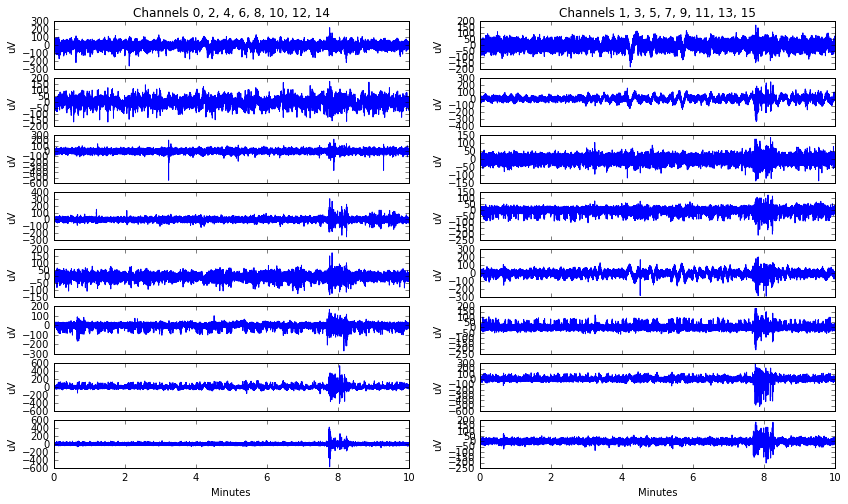

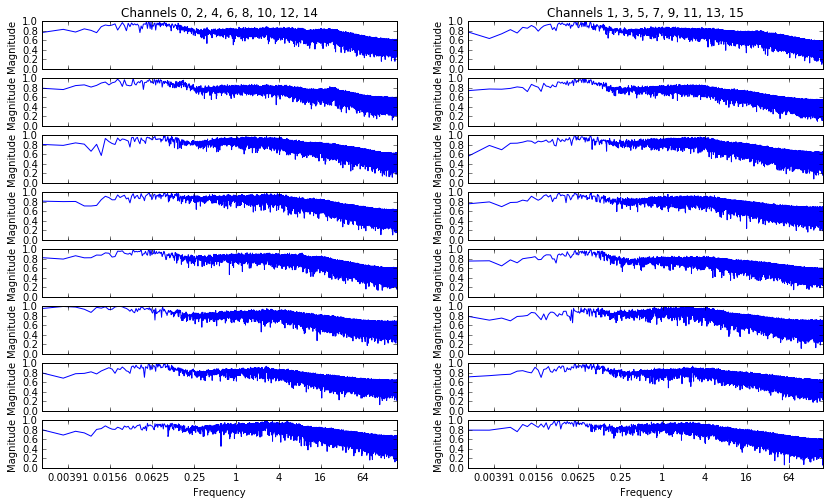

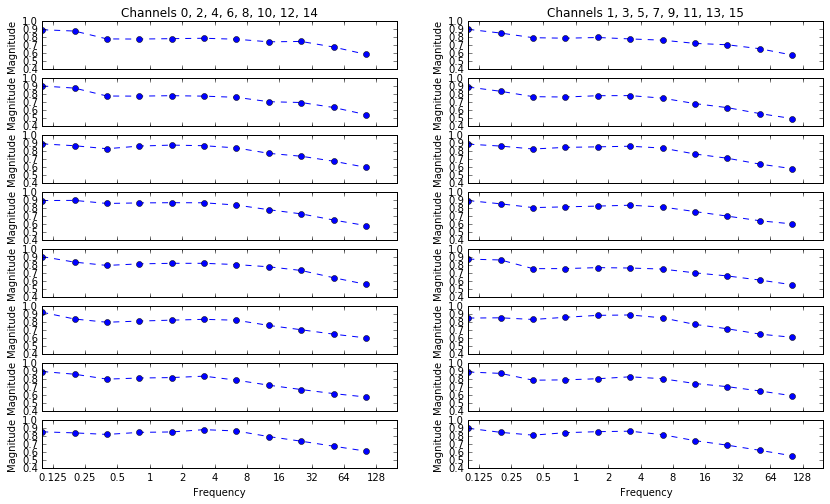

In [86]:
files = "C:\\Users\\Kyler\\Documents\\seizure_data\\train_1\\1_10_1.mat"
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import scipy
import matplotlib.ticker

# read in first file
file = loadmat(files)
# transpose just data in file, this is how we expect it down below
data = file['dataStruct'][0][0][0].transpose()
# full fft data for 16 chans
fft_chans = np.abs(np.array(fftpack.fft(data)))


fig = plt.figure(1, figsize=(14, 8))  # a new figure window
ax = fig.add_subplot(8, 2, 1)  # specify (nrows, ncols, axnum)
x = np.linspace(0, 10, 240000)
for chans in range(16):
    ax = fig.add_subplot(8, 2, chans + 1)
    if chans == 0:
        ax.set_title("Channels 0, 2, 4, 6, 8, 10, 12, 14")
    if chans == 1:
        ax.set_title("Channels 1, 3, 5, 7, 9, 11, 13, 15")
    ax.plot(x, data[chans])
    ax.set_ylabel('uV')
    if chans != 14 and chans != 15:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("Minutes")
fig.show()

fig2 = plt.figure(2, figsize=(14, 8))  # a new figure window
ax2 = fig2.add_subplot(8, 2, 1)  # specify (nrows, ncols, axnum)
for chans in range(16):
    ax2 = fig2.add_subplot(8, 2, chans + 1)
    if chans == 0:
        ax2.set_title("Channels 0, 2, 4, 6, 8, 10, 12, 14")
    if chans == 1:
        ax2.set_title("Channels 1, 3, 5, 7, 9, 11, 13, 15")
    
    fft = scipy.log10(fft_chans[chans]+1)
    if fft.max() != 0:
        fft = fft/fft.max()
    
    freq = fftpack.fftfreq(fft.size,0.0025)
    ax2.semilogx(freq[0:120000],fft[0:120000], basex=2)
    
    ax2.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.3g'))
    ax2.axis((0,200,0,1))
    
    ax2.set_ylabel('Magnitude')
    if chans != 14 and chans != 15:
        ax2.set_xticklabels([])
    else:
        ax2.set_xlabel("Frequency")
fig2.show()


bands = fft_bands
fig3 = plt.figure(3, figsize=(14, 8))  # a new figure window
ax3 = fig3.add_subplot(8, 2, 1)  # specify (nrows, ncols, axnum)
for chans in range(16):
    ax3 = fig3.add_subplot(8, 2, chans + 1)
    fft = scipy.log10(fft_chans[chans]+1)
    if fft.max() != 0:
        fft = fft/fft.max()
    
    if chans == 0:
        ax3.set_title("Channels 0, 2, 4, 6, 8, 10, 12, 14")
    if chans == 1:
        ax3.set_title("Channels 1, 3, 5, 7, 9, 11, 13, 15")
    
    summed_bands = []
    for i_band in range(len(bands) - 1):
        summed_bands.append(sum(fft[bands[i_band]:bands[i_band+1]])/(bands[i_band+1]-bands[i_band]))
    
    ax3.plot(fft_bands_Hz[1:len(fft_bands_Hz)],summed_bands, marker='o', linestyle='--',)
    ax3.set_xscale('log', basex=2)
    
    #ax3.set_xticklabels(fft_bands_Hz[1:len(fft_bands_Hz)])
    ax3.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.3g'))
    ax3.axis((0,200,0.4,1))
    
    ax3.set_ylabel('Magnitude')
    if chans != 14 and chans != 15:
        ax3.set_xticklabels([])
    else:
        ax3.set_xlabel("Frequency")
    
fig3.show()

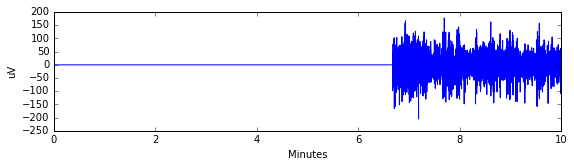

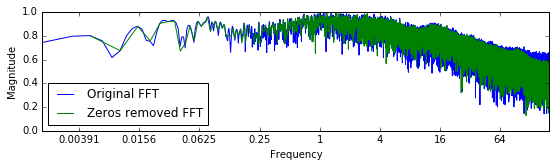

In [97]:
files = "C:\\Users\\Kyler\\Documents\\seizure_data\\train_1\\1_1094_0.mat"
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as plt
import scipy
import matplotlib.ticker

# read in first file
file = loadmat(files)
# transpose just data in file, this is how we expect it down below
data = file['dataStruct'][0][0][0].transpose()
# full fft data for 16 chans
fft_chans = np.abs(np.array(fftpack.fft(data)))

x = np.linspace(0, 10, 240000)

fig = plt.figure(1, figsize=(20, 20))  # a new figure window
ax = fig.add_subplot(8, 2, 1)  # specify (nrows, ncols, axnum)
ax.plot(x, data[0])
ax.set_ylabel('uV')
ax.set_xlabel("Minutes")
fig.show()


fft2 = scipy.log10(fft_chans[0]+1)
if fft2.max() != 0:
    fft2 = fft2/fft2.max()
    
freq2 = fftpack.fftfreq(fft2.size,0.0025)
freq = fftpack.fftfreq(fft.size,0.0025)

filtered_data = filter(lambda a: a != 0, data[0])

fig4 = plt.figure(4, figsize=(20, 20))  # a new figure window
ax4 = fig4.add_subplot(8, 2, 1)  # specify (nrows, ncols, axnum)

filtered_fft = np.abs(np.array(fftpack.fft(filtered_data)))
fft = scipy.log10(filtered_fft+1)
if fft.max() != 0:
    fft = fft/fft.max()
    
ax4.semilogx(freq2[0:(len(fft2)/2)], fft2[0:(len(fft2)/2)], basex=2, label='Original FFT')
ax4.semilogx(freq[0:(len(fft)/2)], fft[0:(len(fft)/2)], basex=2, label='Zeros removed FFT')

ax4.axis((0,200,0,1))
ax4.xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%.3g'))
ax4.set_ylabel('Magnitude')
ax4.set_xlabel("Frequency")
ax4.legend(loc='lower left')
        
fig4.show()

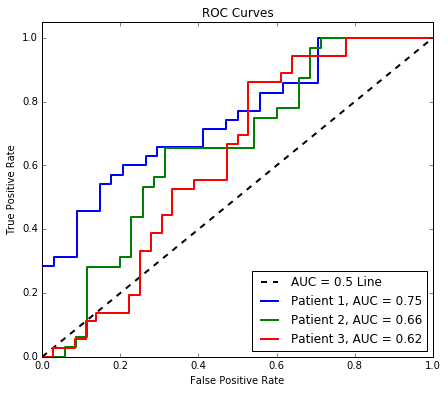

In [136]:
from sklearn import metrics
fig = plt.figure(1, figsize=(7, 6))  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)

ax.plot([0,1],[0,1],'k--', label='AUC = 0.5 Line',linewidth=2.0)
ax.plot(fpr1,tpr1,label='Patient 1, AUC = %.2f'%metrics.auc(fpr1, tpr1),linewidth=2.0)
ax.plot(fpr2,tpr2,label='Patient 2, AUC = %.2f'%metrics.auc(fpr2, tpr2),linewidth=2.0)
ax.plot(fpr3,tpr3,label='Patient 3, AUC = %.2f'%metrics.auc(fpr3, tpr3),linewidth=2.0)
ax.legend(loc='lower right')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curves')
ax.axis((0,1,0,1.05))
fig.show()